The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.

In this notebook, you will discover how to use the Facebook Prophet library for time series forecasting.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

It is designed to be easy and completely automatic, e.g. point it at a time series and get a forecast. As such, it is intended for internal company use, such as forecasting sales, capacity, etc.

The first step is to install the Prophet library using Pip, as follows:

In [1]:
!sudo pip install fbprophet

Next, we can confirm that the library was installed correctly. To do this, we can import the library and print the version number in Python. The complete example is listed below.

In [2]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


**Car Sales Dataset**

We will use the monthly car sales dataset. It is a standard univariate time series dataset that contains both a trend and seasonality. The dataset has 108 months of data and a naive persistence forecast can achieve a mean absolute error of about 3,235 sales, providing a lower error limit.



**Load and Summarize Dataset**

First, let’s load and summarize the dataset. Prophet requires data to be in Pandas DataFrames. Therefore, we will load and summarize the data using Pandas.

We can load the data directly from the URL by calling the read_csv() Pandas function, then summarize the shape (number of rows and columns) of the data and view the first few rows of data.

The complete example is listed below:

In [3]:
# load the car sales dataset
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


**Load and Plot Dataset**

A time-series dataset does not make sense to us until we plot it.Plotting a time series helps us actually see if there is a trend, a seasonal cycle, outliers, and more. It gives us a feel for the data.We can plot the data easily in Pandas by calling the plot() function on the DataFrame.



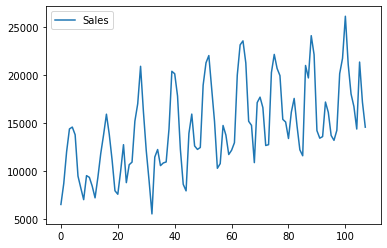

In [4]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

**Forecast car sales with prophet**

In this section, we will explore using the Prophet to forecast the car sales dataset.

Let’s start by fitting a model on the dataset

**Fit Prophet Model**

To use Prophet for forecasting, first, a Prophet() object is defined and configured, then it is fit on the dataset by calling the fit() function and passing the data.

The Prophet() object takes arguments to configure the type of model you want, such as the type of growth, the type of seasonality, and more. By default, the model will work hard to figure out almost everything automatically.

The fit() function takes a DataFrame of time series data. The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

This means we change the column names in the dataset. It also requires that the first column be converted to date-time objects, if they are not already.



In [ ]:
...
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

The complete example of fitting a Prophet model on the car sales dataset is listed below.

In [5]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Make an In-Sample Forecast**

It can be useful to make a forecast on historical data. That is, we can make a forecast on data used as input to train the model. Ideally, the model has seen the data before and would make a perfect prediction. 

This is called making an in-sample (in training set sample) forecast and reviewing the results can give insight into how good the model is. That is, how well it learned the training data.

A forecast is made by calling the predict() function and passing a DataFrame that contains one column named ‘ds‘ and rows with date-times for all the intervals to be predicted.




In [ ]:
...
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

This DataFrame can then be provided to the predict() function to calculate a forecast.

The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘ and ‘yhat_upper‘) that provide uncertainty of the forecast.

For example, we can print the first few predictions as follows:

In [ ]:
...
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Prophet also provides a built-in tool for visualizing the prediction in the context of the training dataset.

This can be achieved by calling the plot() function on the model and passing it a result DataFrame. It will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.

In [ ]:
...
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

trying all this all togeather

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12840.993424  15915.393721
1 1968-02-01  14905.955964  13251.016633  16513.574141
2 1968-03-01  20842.150502  19254.882346  22417.674391
3 1968-04-01  22870.095215  21350.033715  24388.908289
4 1968-05-01  24176.211162  22485.359837  25864.830055


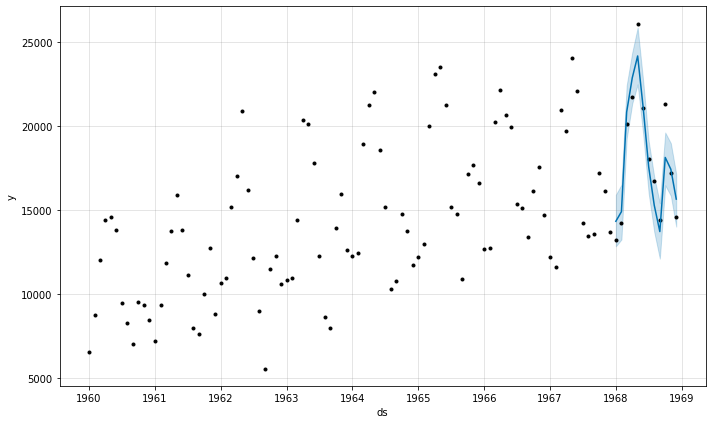

In [7]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

**Manually Evaluate Forecast Model**

It is critical to develop an objective estimate of a forecast model’s performance. This can be achieved by holding some data back from the model, such as the last 12 months. Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. E.g. a simulated out-of-sample forecast.

The score gives an estimate of how well we might expect the model to perform on average when making an out-of-sample forecast.

We can do this with the samples data by creating a new DataFrame for training with the last 12 months removed

In [ ]:
...
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

A forecast can then be made on the last 12 months of date-times.

We can then retrieve the forecast values and the expected values from the original dataset and calculate a mean absolute error metric using the scikit-learn library.

In [ ]:
...
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

It can also be helpful to plot the expected vs. predicted values to see how well the out-of-sample prediction matches the known values.

In [ ]:
...
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

Tying this together, the example below demonstrates how to evaluate a Prophet model on a hold-out dataset.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713
MAE: 1336.814


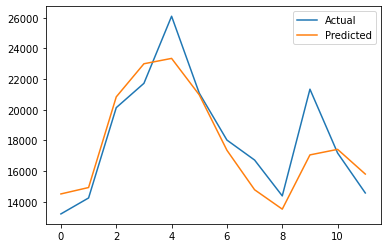

In [8]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()